In [1]:
#Version2

In [11]:
def plot_accuracy_loss(history):
    fig=plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label='acc')
    plt.plot(history.history['val_accuracy'], 'ro--', label='val_acc')
    plt.title('train_acc VS val_acc')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend(fontsize = "large")    
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label='loss')
    plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
    plt.title('train_loss VS val_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.rcParams['axes.facecolor'] = 'white'
    plt.legend()    
    plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
import os
from sklearn.utils import shuffle
from keras.utils import to_categorical
tf.__version__
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Concatenate, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
directory=os.path.abspath("")
print(directory)

C:\Users\Owner\Desktop\my folder\Ogul\week13\dataset


In [14]:
training_generator = ImageDataGenerator(rotation_range=30,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rescale=1/255,
                                shear_range=0.1,
                                zoom_range=0.1,
                                horizontal_flip=True,
                                fill_mode='nearest'
                                )
train_dataset = training_generator.flow_from_directory(directory + '/train/',
                                                       target_size = (48, 48),
                                                       batch_size = 64,
                                                       color_mode = 'grayscale',
                                                       class_mode = 'categorical',
                                                       shuffle = True)

Found 28723 images belonging to 7 classes.


In [15]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(directory + '/validation/',
                                                    target_size = (48, 48),
                                                    batch_size = 64,
                                                    color_mode = 'grayscale',
                                                    class_mode = 'categorical',
                                                    shuffle = False)

Found 3589 images belonging to 7 classes.


In [16]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")

4009 Angry images
436 Disgust images
4097 Fear images
7215 Happy images
4965 Neutral images
4830 Sad images
3171 Surprise images


In [17]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6])

In [36]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
erl_stop = EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights=True)


In [12]:
# Initialising the CNN
model = Sequential()
# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())
# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history=model.fit(train_dataset, batch_size=64, epochs=15, validation_data=test_dataset, callbacks=[erl_stop])

Epoch 1/15
449/449 [==============================] - 801s 2s/step - loss: 1.8834 - accuracy: 0.2535 - val_loss: 1.8981 - val_accuracy: 0.2655
Epoch 2/15
449/449 [==============================] - 798s 2s/step - loss: 1.6317 - accuracy: 0.3639 - val_loss: 1.6666 - val_accuracy: 0.3787
Epoch 3/15
449/449 [==============================] - 824s 2s/step - loss: 1.4775 - accuracy: 0.4278 - val_loss: 1.5985 - val_accuracy: 0.3906
Epoch 4/15
449/449 [==============================] - 872s 2s/step - loss: 1.3807 - accuracy: 0.4679 - val_loss: 1.7266 - val_accuracy: 0.4032
Epoch 5/15
449/449 [==============================] - 876s 2s/step - loss: 1.3287 - accuracy: 0.4906 - val_loss: 1.4603 - val_accuracy: 0.4444
Epoch 6/15
449/449 [==============================] - 828s 2s/step - loss: 1.2894 - accuracy: 0.5056 - val_loss: 1.4547 - val_accuracy: 0.4946
Epoch 7/15
449/449 [==============================] - 875s 2s/step - loss: 1.2582 - accuracy: 0.5207 - val_loss: 1.4805 - val_accuracy: 0.4514

In [59]:
model_json = model.to_json()
model.save_weights(directory + '/model_optimal2.h5')
with open( directory + "/model_optimal2.json", "w") as json_file:
    json_file.write(model_json)

In [60]:
model.save(directory + '/model_optimal2justmodel.h5')

In [17]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis = 1)
predictions

57/57 [==============================] - 13s 216ms/step


array([4, 0, 0, ..., 4, 4, 6], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)

0.44079130677068823

In [19]:
test_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
print(cm)

[[179   0   3   8 210  69  22]
 [ 18   0   0   2  25   8   2]
 [ 55   0  26  21 213 133  80]
 [ 22   0   2 555 227  48  25]
 [ 67   0   5 101 290  95  68]
 [ 29   0   0   6 308 243   8]
 [  6   0   6  21  78  16 289]]


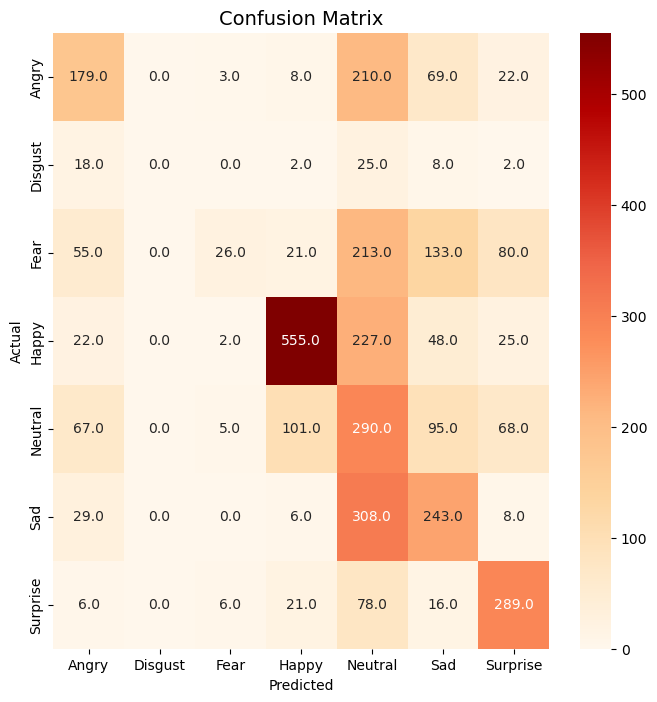

In [58]:
mymap = sns.heatmap(cm, annot=True, cmap="OrRd", fmt=".1f")
mymap.set_title('Confusion Matrix');
mymap.set_xlabel('Predicted')
mymap.set_ylabel('Actual');
mymap.xaxis.set_ticklabels(train_dataset.class_indices)
mymap.yaxis.set_ticklabels(train_dataset.class_indices)
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 10
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Confusion Matrix', fontsize=14)
plt.savefig(directory + '/confusion_matrix.png', transparent=True, dpi=300)
plt.show()

In [20]:
import cv2

facec = cv2.CascadeClassifier(directory + '/haarcascade_frontalface_default.xml')
with open(directory + '/model_optimal2.json', 'r') as json_file:
  json_saved_model = json_file.read()
model = tf.keras.models.model_from_json(json_saved_model)
model.load_weights(directory + '/model_optimal2justmodel.h5')
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [37]:
import cv2
face_detector = cv2.CascadeClassifier(directory + '/haarcascade_frontalface_default.xml')  #usual facedetection
width, height = 48, 48
font = cv2.FONT_HERSHEY_SIMPLEX
camera = cv2.VideoCapture(0)

while (True):
    connected, image = camera.read()
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.5, minSize=(48,48))
    for (x, y, w, h) in detections:
        image_face = cv2.resize(image_gray[y:y + w, x:x + h], (width, height))
        image_face = image_face / 255
        image_face = image_face.reshape(-1, 48, 48, 1)
        predictions = model.predict(image_face)
        prediction = np.argmax(predictions, axis = 1)        
        
        cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 1)  
        if prediction == 0:
            cv2.putText(image, 'Angry', (x,y + (h+50)), font, 1, (0,0,255))          
        if prediction == 1:
            cv2.putText(image, 'Disgust', (x,y + (h+50)), font, 1, (0,0,255))
        if prediction == 2:
            cv2.putText(image, 'Fear', (x,y + (h+50)), font, 1, (0,0,255))
        if prediction == 3:
            cv2.putText(image, 'Happy', (x,y + (h+50)), font, 1, (0,0,255))
        if prediction == 4:
            cv2.putText(image, 'Neutral', (x,y + (h+50)), font, 1, (0,0,255))
        if prediction == 5:
            cv2.putText(image, 'Sad', (x,y + (h+50)), font, 1, (0,0,255))
        if prediction == 6:
            cv2.putText(image, 'Surprise', (x,y + (h+50)), font, 1, (0,0,255))

    cv2.imshow("Face", image)
    if cv2.waitKey(1) == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 50ms/step
